In [1]:
#Polytrope EOS

In [2]:
# Constants
G= 6.67430*(10**(-8))
c= 2.99792458*10**10
pi=3.14

In [3]:
# Instead of r=0, we are starting at r=r0. h is step size
r0=10
h=100

In [4]:
# Polytropic EOS P=K*rho^gamma
k= 5.38*(10**9)
gamma= 1.667

In [5]:
# Defining the central density
rho_c=1*10**15

In [6]:
# Central pressure

p0= k*(rho_c)**gamma

p0

5.442297463918261e+34

In [7]:
# An approximate value of mass to start with at r0
m0=(4/3)*pi*(r0**3)*rho_c
m0

4.186666666666667e+18

In [8]:
m=m0

Here TOV equation is defined:

$\frac{dm}{dr}=4.\pi.r^{2}.\rho$

In [9]:
# the dm/dr function

def dmdr(r, m):
    return 4*pi*(r**2)*rho(r,p)

In [10]:
# rk4 integrator for dm/dr equation

def mrk4(r, m, h):

  for i in range(1):
        "Apply Runge Kutta Formulas to find next value of y"
        k1 = h * dmdr(r, m)
        k2 = h * dmdr(r + 0.5 * h, m + 0.5 * k1)
        k3 = h * dmdr(r + 0.5 * h, m + 0.5 * k2)
        k4 = h * dmdr(r + h, m + k3)

        # Update next value of y
        mnew = m + (1.0 / 6.0)*(k1 + 2 * k2 + 2 * k3 + k4)

        # Update next value of x
        rnew = r + h

        r=rnew
        m=mnew

  return mnew

In [11]:
# to suppy for dm/dr the value of rho, at first step and other steps
def rho(r,p):

  if(r==10):
    rho=rho_c

  else:
    rho=(p/k)**(1.00/gamma)

  return rho

In [12]:
# dp/dr equation

def dpdr(r, p):
  term1= -((G*m)/(r**2))
  term2= rho(r,p)
  term3= 1+(p/(rho(r,p)*(c**2)))
  term4= 1+(((4*pi*(r**3)*p))/(m*(c**2)))
  term5= 1-((2*G*m)/(r*(c**2)))
  return (term1*term2*term3*term4)/term5


In [13]:
# rk4 integrator for dp/dr equation. Once p_new is found, it finds rho_new and calls dm/dr rk4 to get m_new

number=500000    # to run over a number of times

def rk4(r0, p0, h):
    r=r0
    global p
    p=p0

    global m

    for i in range (1, number):
        "Apply Runge Kutta Formulas to find next value of y"
        k1 = h * dpdr(r, p)
        k2 = h * dpdr(r + 0.5 * h, p + 0.5 * k1)
        k3 = h * dpdr(r + 0.5 * h, p + 0.5 * k2)
        k4 = h * dpdr(r + h, p + k3)

        # Update next value of y
        pnew = p + (1.0 / 6.0)*(k1 + 2 * k2 + 2 * k3 + k4)

        # Update next value of x
        rnew = r + h

        r=rnew
        p=pnew

        rho_new=(pnew/k)**(1.0/gamma)

        mnew=mrk4(r,m,h)

        m=mnew

        if(pnew < 0.00):           # to exit the computation when surface of star is encountered
           break



        # to print
        f=open('output.txt','a')
        print(rnew,rho_new,pnew,mnew)
        f.write("{} {} {} {} \n".format(rnew,rho_new,pnew,mnew))
        f.close()


    return pnew

In [14]:
# delete the output file everytime you run so that it don't append below old data

rk4(r0,p0,h)           # calling the rk4 for dp/dr

110 999999995830153.6 5.442297426088143e+34 3.3204453194893326e+22
210 999999873394023.5 5.44229631530968e+34 1.1915670897948933e+23
310 999999715020485.5 5.442294878496065e+34 2.8298092895959604e+23
410 999999519901063.8 5.44229310831266e+34 5.497970675280569e+23
510 999999287436396.9 5.442290999322007e+34 9.447250527832149e+23
610 999999017262462.5 5.4422885482217405e+34 1.4928847807522107e+24
710 999998709149909.5 5.442285752931304e+34 2.2193961096004523e+24
810 999998362946672.9 5.44228261207133e+34 3.149378853833281e+24
910 999997978547277.4 5.442279124685154e+34 4.3079527784927987e+24
1010 999997555875760.8 5.4422752900838915e+34 5.72023759335148e+24
1110 999997094875685.8 5.442271107755821e+34 7.411352947103542e+24
1210 999996595504017.5 5.442266577310838e+34 9.406418421554692e+24
1310 999996057727213.4 5.442261698444982e+34 1.1730553525810663e+25
1410 999995481518636.8 5.442256470916975e+34 1.4408877690464824e+25
1510 999994866856792.6 5.442250894532208e+34 1.746651026178506e+2

39410 996986756526343.5 5.414987866088743e+34 2.577511056080051e+29
39510 996971513655349.5 5.414849856819004e+34 2.5971078572354766e+29
39610 996956232470300.6 5.414711502065724e+34 2.6168035554830413e+29
39710 996940912972634.4 5.414572801852565e+34 2.6365983974526276e+29
39810 996925555163792.2 5.41443375620325e+34 2.6564926297511362e+29
39910 996910159045219.0 5.41429436514156e+34 2.6764864989624296e+29
40010 996894724618363.2 5.414154628691334e+34 2.6965802516472747e+29
40110 996879251884677.1 5.414014546876472e+34 2.716774134343286e+29
40210 996863740845616.2 5.413874119720933e+34 2.737068393564869e+29
40310 996848191502640.2 5.413733347248731e+34 2.7574632758031614e+29
40410 996832603857211.9 5.413592229483944e+34 2.7779590275259782e+29
40510 996816977910797.9 5.413450766450706e+34 2.798555895177753e+29
40610 996801313664868.1 5.413308958173211e+34 2.819254125179482e+29
40710 996785611120896.9 5.413166804675711e+34 2.8400539639286657e+29
40810 996769870280361.1 5.413024305982517

69910 990569445635924.0 5.357009919199938e+34 1.428488153000307e+30
70010 990542600469501.6 5.356767908093137e+34 1.434594804516894e+30
70110 990515717593998.1 5.356525561420198e+34 1.4407187349000454e+30
70210 990488797011943.2 5.356282879222425e+34 1.4468599678501503e+30
70310 990461838725869.8 5.356039861541178e+34 1.453018527063589e+30
70410 990434842738314.4 5.355796508417874e+34 1.4591944362327283e+30
70510 990407809051817.2 5.355552819893985e+34 1.4653877190459165e+30
70610 990380737668922.2 5.355308796011042e+34 1.471598399187477e+30
70710 990353628592176.2 5.355064436810631e+34 1.4778265003377037e+30
70810 990326481824130.1 5.354819742334393e+34 1.484072046172854e+30
70910 990299297367338.2 5.354574712624028e+34 1.4903350603651456e+30
71010 990272075224358.4 5.354329347721292e+34 1.496615566582749e+30
71110 990244815397752.1 5.354083647667997e+34 1.502913588489783e+30
71210 990217517890084.1 5.35383761250601e+34 1.5092291497463094e+30
71310 990190182703922.9 5.3535912422772565

104710 978970260114865.0 5.2528503709932135e+34 4.759274813201225e+30
104810 978930469420899.2 5.252494463806579e+34 4.77279433172893e+30
104910 978890642110054.4 5.252138238763303e+34 4.786339097310405e+30
105010 978850778186074.2 5.251781695923667e+34 4.7999091319276364e+30
105110 978810877652707.2 5.251424835348009e+34 4.813504457556761e+30
105210 978770940513704.2 5.251067657096717e+34 4.8271250961680616e+30
105310 978730966772820.5 5.250710161230231e+34 4.840771069725961e+30
105410 978690956433813.5 5.250352347809045e+34 4.8544424001890175e+30
105510 978650909500445.5 5.249994216893703e+34 4.86813910950992e+30
105610 978610825976481.0 5.249635768544803e+34 4.881861219635481e+30
105710 978570705865688.9 5.249277002822995e+34 4.8956087525066355e+30
105810 978530549171840.9 5.248917919788981e+34 4.9093817300584315e+30
105910 978490355898712.1 5.248558519503514e+34 4.923180174220028e+30
106010 978450126050081.6 5.248198802027401e+34 4.937004106914688e+30
106110 978409859629731.5 5.247

145810 959578121309769.8 5.080543779098855e+34 1.2688161269453418e+31
145910 959523635481785.1 5.080062894585192e+34 1.271383642259978e+31
146010 959469114860019.6 5.079581721216998e+34 1.2739545308002728e+31
146110 959414559449590.8 5.079100259074693e+34 1.2765287944829938e+31
146210 959359969255618.5 5.078618508238742e+34 1.2791064352241282e+31
146310 959305344283227.0 5.078136468789654e+34 1.2816874549388821e+31
146410 959250684537543.0 5.077654140807985e+34 1.2842718555416806e+31
146510 959195990023696.6 5.077171524374336e+34 1.2868596389461668e+31
146610 959141260746821.5 5.076688619569352e+34 1.2894508070652018e+31
146710 959086496712054.1 5.076205426473725e+34 1.2920453618108639e+31
146810 959031697924534.4 5.075721945168191e+34 1.2946433050944483e+31
146910 958976864389405.5 5.075238175733531e+34 1.2972446388264672e+31
147010 958921996111813.8 5.074754118250573e+34 1.2998493649166484e+31
147110 958867093096908.6 5.074269772800188e+34 1.3024574852739353e+31
147210 95881215534984

183810 936417168703955.0 4.877774416649379e+34 2.5040743283976635e+31
183910 936349858616799.2 4.877189952757784e+34 2.5080542507684096e+31
184010 936282515908272.5 4.876605233653188e+34 2.5120382147092104e+31
184110 936215140584679.4 4.8760202594317645e+34 2.516026221810347e+31
184210 936147732652327.5 4.875435030189724e+34 2.520018273661167e+31
184310 936080292117527.6 4.874849546023315e+34 2.524014371850085e+31
184410 936012818986593.1 4.874263807028821e+34 2.5280145179645803e+31
184510 935945313265840.9 4.873677813302564e+34 2.5320187135911986e+31
184610 935877774961590.6 4.873091564940906e+34 2.5360269603155507e+31
184710 935810204080164.6 4.872505062040241e+34 2.540039259722312e+31
184810 935742600627888.8 4.871918304697004e+34 2.544055613395223e+31
184910 935674964611091.6 4.871331293007665e+34 2.5480760229170874e+31
185010 935607296036104.8 4.870744027068733e+34 2.552100489869773e+31
185110 935539594909262.9 4.870156506976753e+34 2.5561290158342106e+31
185210 935471861236903.6 

216610 912628180895388.6 4.672961097665352e+34 4.0350450041488936e+31
216710 912550526249853.0 4.672298287733414e+34 4.04043024152906e+31
216810 912472841207550.2 4.671635255995886e+34 4.0458199900371407e+31
216910 912395125775729.6 4.670972002559895e+34 4.0512142509392157e+31
217010 912317379961643.4 4.670308527532599e+34 4.056613025500327e+31
217110 912239603772545.9 4.669644831021184e+34 4.062016314984475e+31
217210 912161797215694.6 4.6689809131328655e+34 4.067424120654622e+31
217310 912083960298350.0 4.668316773974889e+34 4.072836443772689e+31
217410 912006093027774.8 4.667652413654527e+34 4.0782532855995565e+31
217510 911928195411234.6 4.666987832279085e+34 4.0836746473950635e+31
217610 911850267455998.0 4.666323029955893e+34 4.089100530418008e+31
217710 911772309169336.0 4.665658006792315e+34 4.094530935926148e+31
217810 911694320558522.8 4.66499276289574e+34 4.099965865176198e+31
217910 911616301630834.8 4.664327298373588e+34 4.1054053194238305e+31
218010 911538252393551.5 4.66

254610 880998615085903.4 4.406116510009649e+34 6.416862866168064e+31
254710 880909955900907.5 4.405377372045051e+34 6.424043844954146e+31
254810 880821269264002.0 4.404638054857988e+34 6.431229738771555e+31
254910 880732555183417.9 4.403898558564834e+34 6.438420548473289e+31
255010 880643813667388.4 4.403158883281987e+34 6.445616274911218e+31
255110 880555044724148.9 4.402419029125859e+34 6.452816918936084e+31
255210 880466248361937.5 4.4016789962128865e+34 6.4600224813974995e+31
255310 880377424588994.9 4.40093878465952e+34 6.467232963143948e+31
255410 880288573413563.6 4.400198394582232e+34 6.474448365022782e+31
255510 880199694843888.9 4.399457826097515e+34 6.481668687880229e+31
255610 880110788888218.5 4.398717079321877e+34 6.488893932561384e+31
255710 880021855554802.5 4.397976154371848e+34 6.496124099910211e+31
255810 879932894851893.2 4.3972350513639765e+34 6.503359190769547e+31
255910 879843906787745.4 4.396493770414828e+34 6.510599205981098e+31
256010 879754891370616.4 4.39575

294510 843532794934076.8 4.0982105089539745e+34 9.68010719958824e+31
294610 843433860191845.6 4.097409274291286e+34 9.689304980162304e+31
294710 843334901462054.5 4.0966079080707138e+34 9.698507924881088e+31
294810 843235918753812.0 4.095806410414067e+34 9.70771603413575e+31
294910 843136912076228.5 4.095004781443163e+34 9.716929308316269e+31
295010 843037881438416.1 4.094203021279827e+34 9.726147747811446e+31
295110 842938826849489.4 4.093401130045892e+34 9.735371353008904e+31
295210 842839748318564.5 4.092599107863199e+34 9.744600124295084e+31
295310 842740645854759.9 4.091796954853596e+34 9.753834062055248e+31
295410 842641519467195.9 4.090994671138941e+34 9.76307316667348e+31
295510 842542369164994.5 4.090192256841097e+34 9.772317438532685e+31
295610 842443194957280.0 4.089389712081936e+34 9.781566878014587e+31
295710 842343996853178.8 4.0885870369833384e+34 9.790821485499728e+31
295810 842244774861818.8 4.0877842316671914e+34 9.800081261367476e+31
295910 842145528992330.2 4.086981

333310 803434924338171.1 3.778636389617672e+34 1.3639238369786463e+32
333410 803327384325748.5 3.7777933059202104e+34 1.3650457771699409e+32
333510 803219823997303.0 3.776950138247802e+34 1.3661682400599087e+32
333610 803112243362622.9 3.7761068867231977e+34 1.3672912256416744e+32
333710 803004642431498.4 3.775263551469146e+34 1.3684147339082442e+32
333810 802897021213721.0 3.7744201326083917e+34 1.3695387648525056e+32
333910 802789379719083.6 3.773576630263677e+34 1.3706633184672281e+32
334010 802681717957381.0 3.7727330445577394e+34 1.3717883947450626e+32
334110 802574035938409.0 3.7718893756133155e+34 1.3729139936785417e+32
334210 802466333671965.4 3.771045623553137e+34 1.3740401152600793e+32
334310 802358611167849.0 3.770201788499933e+34 1.3751667594819712e+32
334410 802250868435860.6 3.7693578705764284e+34 1.3762939263363946e+32
334510 802143105485802.1 3.768513869905346e+34 1.3774216158154085e+32
334610 802035322327477.2 3.767669786609405e+34 1.3785498279109535e+32
334710 8019275

366810 766333961816057.9 3.4922650923298375e+34 1.768912645961495e+32
366910 766220172284176.2 3.491400710689768e+34 1.7702085733778727e+32
367010 766106365792009.8 3.490536285849819e+34 1.7715050146062405e+32
367110 765992542349780.8 3.4896718179301492e+34 1.772801969600473e+32
367210 765878701967712.1 3.4888073070509045e+34 1.77409943831433e+32
367310 765764844656028.6 3.487942753332219e+34 1.775397420701456e+32
367410 765650970424955.6 3.487078156894213e+34 1.7766959167153796e+32
367510 765537079284719.4 3.486213517856997e+34 1.7779949263095146e+32
367610 765423171245547.8 3.4853488363406665e+34 1.7792944494371592e+32
367710 765309246317669.2 3.484484112465306e+34 1.7805944860514967e+32
367810 765195304511313.4 3.4836193463509865e+34 1.7818950361055948e+32
367910 765081345836711.0 3.4827545381177674e+34 1.783196099552406e+32
368010 764967370304093.9 3.481889687885695e+34 1.7844976763447676e+32
368110 764853377923694.9 3.481024795774803e+34 1.7857997664354015e+32
368210 7647393687057

405810 720770720367162.6 3.153044510538461e+34 2.3127387023982777e+32
405910 720651100891709.1 3.152172249607614e+34 2.314230401347075e+32
406010 720531468509970.5 3.1512999911464076e+34 2.315722587532918e+32
406110 720411823232479.0 3.1504277352682216e+34 2.3172152608660288e+32
406210 720292165069767.0 3.149555482086414e+34 2.318708421256522e+32
406310 720172494032368.1 3.1486832317143207e+34 2.3202020686144045e+32
406410 720052810130815.9 3.147810984265255e+34 2.3216962028495752e+32
406510 719933113375644.6 3.1469387398525077e+34 2.3231908238718257e+32
406610 719813403777389.0 3.1460664985893477e+34 2.324685931590839e+32
406710 719693681346584.4 3.145194260589021e+34 2.3261815259161918e+32
406810 719573946093766.6 3.144322025964752e+34 2.327677606757352e+32
406910 719454198029471.8 3.1434497948297416e+34 2.3291741740236804e+32
407010 719334437164236.6 3.142577567297169e+34 2.3306712276244302e+32
407110 719214663508598.8 3.1417053434801905e+34 2.3321687674687466e+32
407210 71909487707

441610 677202340530177.6 2.8417765915928633e+34 2.8771507344459727e+32
441710 677078776544806.9 2.840912275576953e+34 2.878810327546386e+32
441810 676955203445281.0 2.840048001022369e+34 2.880470369058779e+32
441910 676831621242221.4 2.83918376803306e+34 2.882130858856548e+32
442010 676708029946249.2 2.838319576712945e+34 2.8837917968129923e+32
442110 676584429567985.8 2.837455427165913e+34 2.885453182801314e+32
442210 676460820118052.0 2.836591319495822e+34 2.887115016694618e+32
442310 676337201607069.5 2.8357272538065003e+34 2.8887772983659114e+32
442410 676213574045659.0 2.8348632302017454e+34 2.8904400276881043e+32
442510 676089937444442.0 2.833999248785325e+34 2.8921032045340097e+32
442610 675966291814039.2 2.8331353096609764e+34 2.8937668287763435e+32
442710 675842637165072.0 2.832271412932406e+34 2.8954309002877242e+32
442810 675718973508161.2 2.831407558703291e+34 2.897095418940673e+32
442910 675595300853928.1 2.8305437470772766e+34 2.898760384607615e+32
443010 675471619212993.

476210 633977841305639.6 2.5458907605665636e+34 3.4772112021460865e+32
476310 633851756726223.8 2.545046776100094e+34 3.479017743520574e+32
476410 633725666696042.2 2.5442028671256224e+34 3.480824683931841e+32
476510 633599571225619.0 2.5433590337355125e+34 3.482632023221736e+32
476610 633473470325477.2 2.5425152760220905e+34 3.484439761232021e+32
476710 633347364006139.8 2.5416715940776465e+34 3.486247897804375e+32
476810 633221252278128.8 2.540827987994434e+34 3.488056432780393e+32
476910 633095135151966.2 2.5399844578646705e+34 3.4898653660015826e+32
477010 632969012638172.9 2.539141003780536e+34 3.491674697309371e+32
477110 632842884747269.8 2.5382976258341744e+34 3.493484426545098e+32
477210 632716751489776.4 2.537454324117693e+34 3.4952945535500205e+32
477310 632590612876212.6 2.5366110987231624e+34 3.497105078165311e+32
477410 632464468917097.2 2.5357679497426163e+34 3.498916000232058e+32
477510 632338319622948.6 2.534924877268052e+34 3.500727319591265e+32
477610 632212165004284

514310 585640710599144.0 2.2306096889693877e+34 4.192873059878363e+32
514410 585513304821181.5 2.229800806285982e+34 4.194819448852296e+32
514510 585385897548887.9 2.2289920315076273e+34 4.196766170874882e+32
514610 585258488792470.8 2.228183364711747e+34 4.198713225758865e+32
514710 585131078562136.9 2.2273748059757227e+34 4.2006606133169236e+32
514810 585003666868092.0 2.2265663553768947e+34 4.202608333361666e+32
514910 584876253720540.6 2.2257580129925617e+34 4.204556385705633e+32
515010 584748839129686.1 2.2249497788999804e+34 4.206504770161299e+32
515110 584621423105730.9 2.224141653176366e+34 4.20845348654107e+32
515210 584494005658875.8 2.2233336358988923e+34 4.210402534657284e+32
515310 584366586799321.2 2.2225257271446915e+34 4.212351914322213e+32
515410 584239166537266.0 2.221717926990854e+34 4.2143016253480596e+32
515510 584111744882908.0 2.2209102355144283e+34 4.216251667546961e+32
515610 583984321846443.8 2.220102652792422e+34 4.218202040730986e+32
515710 583856897438068.9

554710 534157137215857.25 1.9134034738516763e+34 5.0042137345495165e+32
554810 534029944996931.9 1.9126440238707127e+34 5.006278744201133e+32
554910 533902755301419.5 1.9118847095915322e+34 5.008344006255398e+32
555010 533775568138962.44 1.9111255310740738e+34 5.01040952050161e+32
555110 533648383519201.25 1.9103664883782315e+34 5.01247528672902e+32
555210 533521201451774.9 1.9096075815638548e+34 5.014541304726831e+32
555310 533394021946320.5 1.908848810690749e+34 5.016607574284196e+32
555410 533266845012473.7 1.9080901758186745e+34 5.018674095190223e+32
555510 533139670659868.3 1.907331677007347e+34 5.0207408672339714e+32
555610 533012498898136.56 1.906573314316438e+34 5.022807890204452e+32
555710 532885329736908.9 1.9058150878055738e+34 5.0248751638906296e+32
555810 532758163185814.1 1.9050569975343368e+34 5.02694268808142e+32
555910 532630999254479.4 1.9042990435622643e+34 5.029010462565692e+32
556010 532503837952530.0 1.9035412259488494e+34 5.0310784871322665e+32
556110 53237667928

592710 486091770314457.8 1.6350898743456623e+34 5.8051434857390216e+32
592810 485966214966597.44 1.63438590011372e+34 5.8072888449405684e+32
592910 485840665673410.7 1.633682081124629e+34 5.8094343734951025e+32
593010 485715122443808.6 1.632978417421219e+34 5.811580071177438e+32
593110 485589585286700.2 1.632274909046275e+34 5.813725937762361e+32
593210 485464054210992.25 1.631571556042537e+34 5.815871973024629e+32
593310 485338529225589.44 1.630868358452699e+34 5.818018176738974e+32
593410 485213010339394.25 1.6301653163194113e+34 5.820164548680097e+32
593510 485087497561307.06 1.6294624296852776e+34 5.8223110886226724e+32
593610 484961990900226.0 1.6287596985928577e+34 5.824457796341347e+32
593710 484836490365047.1 1.6280571230846656e+34 5.826604671610738e+32
593810 484710995964664.25 1.6273547032031705e+34 5.828751714205438e+32
593910 484585507707969.06 1.6266524389907962e+34 5.830898923900009e+32
594010 484460025603851.06 1.625950330489922e+34 5.833046300468986e+32
594110 484334549

630310 439386296970573.25 1.3816797908996942e+34 6.621738925394724e+32
630410 439263626534509.4 1.3810368131177584e+34 6.623931881598703e+32
630510 439140965341854.1 1.3803940035273185e+34 6.626124920965033e+32
630610 439018313400630.6 1.3797513621544733e+34 6.628318043261657e+32
630710 438895670718859.3 1.3791088890252784e+34 6.630511248256512e+32
630810 438773037304558.1 1.3784665841657455e+34 6.632704535717528e+32
630910 438650413165742.5 1.3778244476018432e+34 6.634897905412625e+32
631010 438527798310425.25 1.377182479359496e+34 6.637091357109714e+32
631110 438405192746616.7 1.3765406794645857e+34 6.639284890576701e+32
631210 438282596482324.5 1.3758990479429497e+34 6.64147850558148e+32
631310 438160009525553.94 1.3752575848203824e+34 6.643672201891939e+32
631410 438037431884307.5 1.3746162901226347e+34 6.64586597927596e+32
631510 437914863566585.3 1.3739751638754137e+34 6.648059837501412e+32
631610 437792304580384.9 1.3733342061043832e+34 6.65025377633616e+32
631710 43766975493370

664610 397904498896566.75 1.1711529530311772e+34 7.377250776256201e+32
664710 397785452004594.3 1.170568909668258e+34 7.379458619800004e+32
664810 397666416952383.44 1.1699850409464221e+34 7.381666466763082e+32
664910 397547393747031.5 1.1694013468773091e+34 7.383874316913514e+32
665010 397428382395633.1 1.1688178274725177e+34 7.386082170019387e+32
665110 397309382905280.0 1.1682344827436063e+34 7.388290025848802e+32
665210 397190395283061.0 1.1676513127020927e+34 7.390497884169864e+32
665310 397071419536062.25 1.1670683173594543e+34 7.392705744750692e+32
665410 396952455671367.0 1.166485496727128e+34 7.39491360735941e+32
665510 396833503696055.6 1.1659028508165104e+34 7.397121471764152e+32
665610 396714563617205.7 1.165320379638957e+34 7.399329337733064e+32
665710 396595635441891.9 1.1647380832057838e+34 7.4015372050343e+32
665810 396476719177186.1 1.1641559615282655e+34 7.403745073436022e+32
665910 396357814830157.44 1.1635740146176369e+34 7.405952942706405e+32
666010 396238922407872

691310 366561090419861.75 1.0214432999084237e+34 7.966141350031273e+32
691410 366445447765403.9 1.020906174304765e+34 7.968341909425048e+32
691510 366329818743183.25 1.0203692250472637e+34 7.970542410791036e+32
691610 366214203359519.4 1.0198324521371584e+34 7.972742853901464e+32
691710 366098601620728.8 1.0192958555756506e+34 7.974943238528587e+32
691810 365983013533125.3 1.0187594353639045e+34 7.977143564444677e+32
691910 365867439103019.25 1.0182231915030469e+34 7.97934383142203e+32
692010 365751878336718.3 1.0176871239941675e+34 7.981544039232964e+32
692110 365636331240527.2 1.0171512328383189e+34 7.983744187649818e+32
692210 365520797820747.44 1.0166155180365162e+34 7.985944276444955e+32
692310 365405278083677.7 1.0160799795897377e+34 7.988144305390759e+32
692410 365289772035613.6 1.0155446174989242e+34 7.990344274259637e+32
692510 365174279682847.94 1.0150094317649796e+34 7.992544182824017e+32
692610 365058801031670.2 1.0144744223887705e+34 7.99474403085635e+32
692710 36494333608

726810 326409291174749.9 8.418299714813501e+33 8.742026071278258e+32
726910 326298862700158.25 8.41355260214536e+33 8.744191910580052e+32
727010 326188449910598.5 8.40880723496892e+33 8.74635761270797e+32
727110 326078052811306.2 8.404063613173317e+33 8.748523177444843e+32
727210 325967671407513.6 8.399321736647374e+33 8.750688604573542e+32
727310 325857305704450.06 8.394581605279588e+33 8.75285389387697e+32
727410 325746955707341.7 8.38984321895814e+33 8.755019045138072e+32
727510 325636621421411.44 8.385106577570888e+33 8.757184058139831e+32
727610 325526302851879.4 8.380371681005374e+33 8.759348932665266e+32
727710 325416000003962.2 8.375638529148818e+33 8.761513668497432e+32
727810 325305712882873.7 8.370907121888124e+33 8.763678265419426e+32
727910 325195441493824.5 8.366177459109873e+33 8.765842723214382e+32
728010 325085185842022.1 8.36144954070033e+33 8.768007041665467e+32
728110 324974945932670.94 8.356723366545442e+33 8.770171220555891e+32
728210 324864721770972.25 8.35199893

766210 284164706833212.4 6.681649579236693e+33 9.582589882126819e+32
766310 284060832071795.5 6.677578531013e+33 9.584685280741113e+32
766410 283956974816780.0 6.673509161483954e+33 9.586780459923824e+32
766510 283853135072172.3 6.669441470425417e+33 9.588875419475596e+32
766610 283749312841975.56 6.665375457612993e+33 9.59097015919712e+32
766710 283645508130189.8 6.661311122822034e+33 9.593064678889145e+32
766810 283541720940812.0 6.65724846582764e+33 9.595158978352468e+32
766910 283437951277835.9 6.653187486404656e+33 9.597253057387943e+32
767010 283334199145252.3 6.649128184327674e+33 9.599346915796474e+32
767110 283230464547048.9 6.645070559371034e+33 9.601440553379018e+32
767210 283126747487210.0 6.641014611308822e+33 9.603533969936583e+32
767310 283023047969717.0 6.636960339914873e+33 9.605627165270233e+32
767410 282919365998548.3 6.632907744962768e+33 9.607720139181082e+32
767510 282815701577678.94 6.628856826225836e+33 9.609812891470299e+32
767610 282712054711081.0 6.6248075834

798510 251544455188986.88 5.452642967757086e+33 1.0246907530851432e+33
798610 251446426086493.72 5.449101147734076e+33 1.0248921992366034e+33
798710 251348415623564.97 5.445560921786371e+33 1.0250936172965696e+33
798810 251250423803212.3 5.442022289616992e+33 1.025295007246967e+33
798910 251152450628444.2 5.438485250928759e+33 1.0254963690697277e+33
799010 251054496102266.16 5.434949805424299e+33 1.0256977027467896e+33
799110 250956560227680.72 5.431415952806044e+33 1.025899008260097e+33
799210 250858643007687.38 5.427883692776226e+33 1.0261002855916002e+33
799310 250760744445282.5 5.424353025036882e+33 1.0263015347232565e+33
799410 250662864543459.5 5.420823949289852e+33 1.0265027556370286e+33
799510 250565003305208.78 5.417296465236784e+33 1.026703948314886e+33
799610 250467160733517.66 5.413770572579124e+33 1.0269051127388044e+33
799710 250369336831370.44 5.410246271018128e+33 1.0271062488907655e+33
799810 250271531601748.44 5.406723560254854e+33 1.0273073567527575e+33
799910 250173

835410 216660001733230.75 4.2513360852677103e+33 1.096971855674703e+33
835510 216569030251557.06 4.2483608128010333e+33 1.09716176280634e+33
835610 216478078318568.22 4.2453870129067394e+33 1.0973516356230533e+33
835710 216387145936188.56 4.242414685227025e+33 1.0975414741092483e+33
835810 216296233106339.66 4.2394438294039534e+33 1.097731278249337e+33
835910 216205339830940.22 4.236474445079455e+33 1.0979210480277388e+33
836010 216114466111906.1 4.233506531895327e+33 1.09811078342888e+33
836110 216023611951150.34 4.230540089493235e+33 1.0983004844371943e+33
836210 215932777350583.06 4.2275751175147115e+33 1.0984901510371224e+33
836310 215841962312111.66 4.224611615601157e+33 1.0986797832131121e+33
836410 215751166837640.6 4.22164958339384e+33 1.0988693809496187e+33
836510 215660390929071.5 4.218689020533897e+33 1.0990589442311044e+33
836610 215569634588303.22 4.2157299266623334e+33 1.0992484730420386e+33
836710 215478897817231.7 4.212772301420022e+33 1.0994379673668977e+33
836810 2153

872610 184181769313824.8 3.243011028712644e+33 1.1651223711794797e+33
872710 184098179045521.9 3.240557860312255e+33 1.1652984993402367e+33
872810 184014608851204.72 3.238106023603553e+33 1.1654745878939179e+33
872910 183931058731787.25 3.235655518190527e+33 1.1656506368277125e+33
873010 183847528688180.8 3.2332063436770925e+33 1.165826646128818e+33
873110 183764018721294.25 3.230758499667092e+33 1.1660026157844393e+33
873210 183680528832033.84 3.228311985764295e+33 1.1661785457817891e+33
873310 183597059021303.2 3.225866801572397e+33 1.1663544361080882e+33
873410 183513609290003.47 3.223422946695024e+33 1.1665302867505648e+33
873510 183430179639033.2 3.220980420735726e+33 1.1667060976964552e+33
873610 183346770069288.28 3.2185392232979824e+33 1.1668818689330033e+33
873710 183263380581662.16 3.2160993539852e+33 1.1670576004474609e+33
873810 183180011177045.62 3.213660812400714e+33 1.1672332922270874e+33
873910 183096661856327.0 3.211223598147787e+33 1.1674089442591502e+33
874010 183013

895310 165723181336807.2 2.719531997195533e+33 1.2040637019310193e+33
895410 165644166448032.38 2.7173708398948696e+33 1.2042305257915695e+33
895510 165565171776347.78 2.7152109227984833e+33 1.2043973073390943e+33
895610 165486197322105.4 2.713052245497521e+33 1.2045640465625811e+33
895710 165407243085654.8 2.7108948075830885e+33 1.2047307434510257e+33
895810 165328309067343.3 2.7087386086462535e+33 1.2048973979934314e+33
895910 165249395267515.7 2.706583648278042e+33 1.2050640101788102e+33
896010 165170501686514.47 2.7044299260694415e+33 1.2052305799961814e+33
896110 165091628324679.75 2.702277441611398e+33 1.205397107434573e+33
896210 165012775182349.3 2.7001261944948203e+33 1.2055635924830208e+33
896310 164933942259858.53 2.6979761843105753e+33 1.2057300351305685e+33
896410 164855129557540.44 2.6958274106494925e+33 1.205896435366268e+33
896510 164776337075725.7 2.6936798731023614e+33 1.2060627931791794e+33
896610 164697564814742.53 2.6915335712599323e+33 1.2062291085583706e+33
89671

919010 147562516444413.9 2.2411212612573052e+33 1.2423945426404787e+33
919110 147488297772577.12 2.2392425275693127e+33 1.2425510480798182e+33
919210 147414099336976.06 2.2373649363568583e+33 1.2427075088231111e+33
919310 147339921137427.2 2.2354884872052806e+33 1.2428639248612755e+33
919410 147265763173744.88 2.2336131796999094e+33 1.2430202961852378e+33
919510 147191625445741.3 2.231739013426065e+33 1.2431766227859325e+33
919610 147117507953226.56 2.2298659879690586e+33 1.2433329046543024e+33
919710 147043410696008.56 2.227994102914193e+33 1.2434891417812986e+33
919810 146969333673893.1 2.226123357846762e+33 1.2436453341578804e+33
919910 146895276886683.84 2.2242537523520506e+33 1.2438014817750151e+33
920010 146821240334182.28 2.2223852860153358e+33 1.2439575846236787e+33
920110 146747224016187.8 2.2205179584218855e+33 1.244113642694855e+33
920210 146673227932497.7 2.2186517691569599e+33 1.2442696559795363e+33
920310 146599252082907.06 2.2167867178058108e+33 1.2444256244687232e+33
92

942810 130468515157259.19 1.825283426862253e+33 1.2783632015685365e+33
942910 130399102918300.78 1.8236649027428185e+33 1.2785088315467457e+33
943010 130329710813819.84 1.8220474224123632e+33 1.278654414900752e+33
943110 130260338843152.78 1.8204309854573367e+33 1.2787999516234469e+33
943210 130190987005634.08 1.8188155914642061e+33 1.27894544170773e+33
943310 130121655300596.33 1.817201240019457e+33 1.2790908851465094e+33
943410 130052343727370.28 1.8155879307095927e+33 1.2792362819327017e+33
943510 129983052285284.73 1.8139756631211356e+33 1.2793816320592313e+33
943610 129913780973666.67 1.8123644368406262e+33 1.2795269355190315e+33
943710 129844529791841.11 1.8107542514546233e+33 1.2796721923050437e+33
943810 129775298739131.28 1.8091451065497048e+33 1.2798174024102174e+33
943910 129706087814858.45 1.8075370017124672e+33 1.279962565827511e+33
944010 129636897018342.06 1.8059299365295257e+33 1.280107682549891e+33
944110 129567726348899.62 1.804323910587515e+33 1.2802527525703319e+33


969310 112776172950200.28 1.4316227880390895e+33 1.3153041094030587e+33
969410 112712067563697.14 1.430266477832632e+33 1.3154371609247114e+33
969510 112647982073138.66 1.4289111027656852e+33 1.31557016423072e+33
969610 112583916477399.67 1.427556662432965e+33 1.315703119316192e+33
969710 112519870775353.44 1.4262031564292318e+33 1.315836026176244e+33
969810 112455844965871.62 1.4248505843492896e+33 1.3159688848060004e+33
969910 112391839047824.33 1.4234989457879863e+33 1.3161016952005942e+33
970010 112327853020080.0 1.422148240340213e+33 1.3162344573551666e+33
970110 112263886881505.61 1.4207984676009057e+33 1.3163671712648676e+33
970210 112199940630966.42 1.4194496271650434e+33 1.3164998369248552e+33
970310 112136014267326.23 1.4181017186276505e+33 1.316632454330296e+33
970410 112072107789447.16 1.4167547415837945e+33 1.316765023476365e+33
970510 112008221196189.8 1.415408695628588e+33 1.3168975443582454e+33
970610 111944354486413.14 1.414063580357187e+33 1.3170300169711286e+33
97071

1009310 88708230420758.44 9.594848538029274e+32 1.3646341186549532e+33
1009410 88651978034183.88 9.584708049024221e+32 1.3647475821871208e+33
1009510 88595744979176.94 9.574575333535056e+32 1.3648609962148538e+33
1009610 88539531254071.81 9.564450387745192e+32 1.364974360736606e+33
1009710 88483336857201.6 9.554333207838768e+32 1.3650876757508393e+33
1009810 88427161786898.28 9.54422379000065e+32 1.3652009412560238e+33
1009910 88371006041492.75 9.534122130416432e+32 1.365314157250638e+33
1010010 88314869619314.78 9.524028225272441e+32 1.3654273237331696e+33
1010110 88258752518693.06 9.513942070755726e+32 1.3655404407021133e+33
1010210 88202654737955.19 9.50386366305407e+32 1.3656535081559728e+33
1010310 88146576275427.62 9.493792998355988e+32 1.3657665260932602e+33
1010410 88090517129435.78 9.48373007285072e+32 1.3658794945124958e+33
1010510 88034477298303.95 9.473674882728246e+32 1.3659924134122085e+33
1010610 87978456780355.33 9.46362742417927e+32 1.3661052827909348e+33
1010710 87922

1038710 72995360668372.5 6.932589291770902e+32 1.3958562477310412e+33
1038810 72944715770354.73 6.92457304634391e+32 1.3959551252419975e+33
1038910 72894089671924.3 6.916563485916171e+32 1.396053953152095e+33
1039010 72843482371146.02 6.908560606907242e+32 1.3961527314622298e+33
1039110 72792893866083.98 6.900564405737545e+32 1.3962514601733058e+33
1039210 72742324154801.56 6.892574878828379e+32 1.3963501392862357e+33
1039310 72691773235361.42 6.88459202260191e+32 1.39644876880194e+33
1039410 72641241105825.5 6.87661583348118e+32 1.3965473487213477e+33
1039510 72590727764255.02 6.868646307890096e+32 1.3966458790453965e+33
1039610 72540233208710.48 6.860683442253445e+32 1.3967443597750314e+33
1039710 72489757437251.72 6.852727232996884e+32 1.3968427909112068e+33
1039810 72439300447937.77 6.844777676546942e+32 1.3969411724548845e+33
1039910 72388862238827.05 6.836834769331023e+32 1.397039504407035e+33
1040010 72338442807977.22 6.828898507777406e+32 1.3971377867686367e+33
1040110 72288042

1080010 53655168847560.76 4.149968077218228e+32 1.4324930390390933e+33
1080110 53612116817849.68 4.144418675294943e+32 1.4325716039778365e+33
1080210 53569082743720.45 4.1388745575584254e+32 1.4326501203889523e+33
1080310 53526066623062.875 4.1333357208141075e+32 1.4327285882767503e+33
1080410 53483068453766.61 4.127802161868401e+32 1.432807007645548e+33
1080510 53440088233721.24 4.1222738775287e+32 1.4328853784996715e+33
1080610 53397125960816.266 4.116750864603382e+32 1.432963700843455e+33
1080710 53354181632941.05 4.111233119901806e+32 1.4330419746812413e+33
1080810 53311255247984.85 4.105720640234312e+32 1.433120200017381e+33
1080910 53268346803836.89 4.100213422412225e+32 1.433198376856233e+33
1081010 53225456298386.234 4.09471146324785e+32 1.433276505202165e+33
1081110 53182583729521.875 4.089214759554478e+32 1.4333545850595528e+33
1081210 53139729095132.73 4.08372330814638e+32 1.43343261643278e+33
1081310 53096892393107.58 4.078237105838811e+32 1.433510599326239e+33
1081410 5305

1118010 38569254514352.51 2.3935716402363234e+32 1.4588994479448096e+33
1118110 38532874200127.875 2.389809191610887e+32 1.4589599581950034e+33
1118210 38496511048270.914 2.3860508848564757e+32 1.4590204221556318e+33
1118310 38460165056764.164 2.382296717157754e+32 1.4590808398341894e+33
1118410 38423836223590.805 2.3785466857003884e+32 1.4591412112381805e+33
1118510 38387524546734.664 2.3748007876710474e+32 1.459201536375117e+33
1118610 38351230024180.22 2.3710590202574017e+32 1.45926181525252e+33
1118710 38314952653912.586 2.367321380648124e+32 1.4593220478779186e+33
1118810 38278692433917.52 2.3635878660328885e+32 1.459382234258851e+33
1118910 38242449362181.47 2.359858473602372e+32 1.4594423744028635e+33
1119010 38206223436691.48 2.3561332005482523e+32 1.4595024683175113e+33
1119110 38170014655435.29 2.35241204406321e+32 1.459562516010358e+33
1119210 38133823016401.29 2.348695001340927e+32 1.459622517488976e+33
1119310 38097648517578.53 2.3449820695760865e+32 1.459682472760946e+33


1141410 30519963049031.59 1.6202566382969971e+32 1.471813797694669e+33
1141510 30487545388209.71 1.6173887436627987e+32 1.4718636987333117e+33
1141610 30455144440544.02 1.6145243592863365e+32 1.471913555472816e+33
1141710 30422760204239.09 1.6116634825846637e+32 1.4719633679227248e+33
1141810 30390392677500.773 1.6088061109758132e+32 1.4720131360925903e+33
1141910 30358041858536.23 1.6059522418787975e+32 1.4720628599919734e+33
1142010 30325707745553.934 1.6031018727136087e+32 1.4721125396304443e+33
1142110 30293390336763.656 1.6002550009012178e+32 1.472162175017582e+33
1142210 30261089630376.492 1.597411623863575e+32 1.4722117661629742e+33
1142310 30228805624604.84 1.5945717390236098e+32 1.4722613130762185e+33
1142410 30196538317662.42 1.5917353438052301e+32 1.4723108157669206e+33
1142510 30164287707764.285 1.5889024356333227e+32 1.472360274244696e+33
1142610 30132053793126.797 1.5860730119337526e+32 1.4724096885191683e+33
1142710 30099836571967.664 1.5832470701333635e+32 1.47245905859

1161910 24221377366967.023 1.1021526146450619e+32 1.4811313693726736e+33
1162010 24192350457222.652 1.0999516874794364e+32 1.481172401573295e+33
1162110 24163339924962.46 1.0977537613054465e+32 1.4812133916234977e+33
1162210 24134345768737.35 1.0955588337371489e+32 1.4812543395347346e+33
1162310 24105367987100.38 1.0933669023895387e+32 1.4812952453184692e+33
1162410 24076406578606.742 1.0911779648785502e+32 1.4813361089861736e+33
1162510 24047461541813.785 1.0889920188210547e+32 1.4813769305493306e+33
1162610 24018532875281.02 1.0868090618348623e+32 1.4814177100194322e+33
1162710 23989620577570.1 1.08462909153872e+32 1.4814584474079803e+33
1162810 23960724647244.875 1.0824521055523129e+32 1.4814991427264865e+33
1162910 23931845082871.336 1.0802781014962623e+32 1.4815397959864718e+33
1163010 23902981883017.67 1.0781070769921272e+32 1.4815804071994675e+33
1163110 23874135046254.242 1.0759390296624026e+32 1.4816209763770143e+33
1163210 23845304571153.598 1.0737739571305201e+32 1.481661503

1198510 14681605227458.488 4.784028635087771e+31 1.4934339534449147e+33
1198610 14658497497140.305 4.7714832194004185e+31 1.4934604062128918e+33
1198710 14635405808735.13 4.758959683400657e+31 1.493486821716494e+33
1198810 14612330162044.373 4.746458006448459e+31 1.4935131999711402e+33
1198910 14589270556874.645 4.733978167911847e+31 1.493539540992262e+33
1199010 14566226993037.795 4.72152014716689e+31 1.4935658447953028e+33
1199110 14543199470350.896 4.709083923597698e+31 1.4935921113957195e+33
1199210 14520187988636.285 4.696669476596417e+31 1.4936183408089808e+33
1199310 14497192547721.555 4.684276785563223e+31 1.493644533050568e+33
1199410 14474213147439.586 4.6719058299063185e+31 1.4936706881359745e+33
1199510 14451249787628.547 4.659556589041926e+31 1.4936968060807065e+33
1199610 14428302468131.918 4.647229042394284e+31 1.493722886900283e+33
1199710 14405371188798.496 4.634923169395642e+31 1.4937489306102348e+33
1199810 14382455949482.418 4.622638949486251e+31 1.4937749372261058e

1236110 7127644503196.345 1.4343109335735971e+31 1.500899599946876e+33
1236210 7110615478459.772 1.428603033171441e+31 1.5009132494382595e+33
1236310 7093602965525.04 1.4229097644719532e+31 1.5009268684755304e+33
1236410 7076606967803.404 1.4172311093839576e+31 1.5009404570800123e+33
1236510 7059627488723.217 1.4115670498213043e+31 1.5009540152730495e+33
1236610 7042664531729.974 1.4059175677028564e+31 1.500967543076007e+33
1236710 7025718100286.396 1.4002826449524773e+31 1.5009810405102713e+33
1236810 7008788197872.493 1.3946622634990175e+31 1.5009945075972486e+33
1236910 6991874827985.629 1.3890564052763013e+31 1.5010079443583663e+33
1237010 6974977994140.592 1.3834650522231135e+31 1.501021350815073e+33
1237110 6958097699869.665 1.3778881862831868e+31 1.5010347269888382e+33
1237210 6941233948722.694 1.3723257894051876e+31 1.501048072901152e+33
1237310 6924386744267.158 1.3667778435427033e+31 1.5010613885735256e+33
1237410 6907556090088.237 1.3612443306542287e+31 1.5010746740274917e+3

1272310 2085886305214.7524 1.8494379308600568e+30 1.504035227627087e+33
1272410 2075270125974.4153 1.833773494502512e+30 1.5040394480167648e+33
1272510 2064673844468.1763 1.8181916251853843e+30 1.5040436475172122e+33
1272610 2054097481817.6848 1.8026921447876812e+30 1.5040478261622276e+33
1272710 2043541059274.796 1.787274875114324e+30 1.5040519839856706e+33
1272810 2033004598222.681 1.771939637895252e+30 1.504056121021463e+33
1272910 2022488120176.9539 1.756686254784519e+30 1.5040602373035883e+33
1273010 2011991646786.8115 1.741514547359385e+30 1.5040643328660926e+33
1273110 2001515199836.1863 1.7264243371193953e+30 1.5040684077430847e+33
1273210 1991058801244.9102 1.7114154454854556e+30 1.5040724619687367e+33
1273310 1980622473069.9 1.696487693798898e+30 1.504076495577284e+33
1273410 1970206237506.348 1.6816409033205388e+30 1.5040805086030256e+33
1273510 1959810116888.935 1.6668748952297267e+30 1.5040845010803244e+33
1273610 1949434133693.0525 1.6521894906233856e+30 1.504088473043607

TypeError: '<' not supported between instances of 'complex' and 'float'

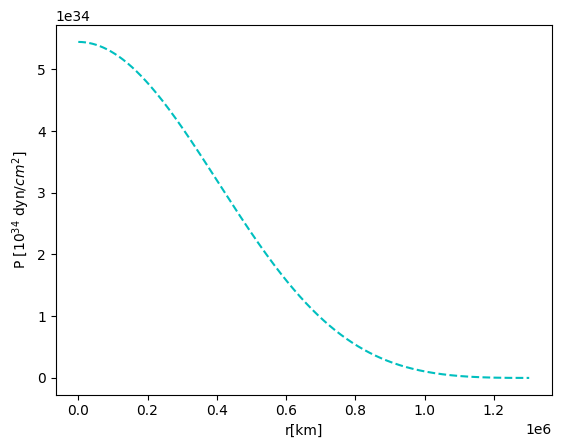

In [15]:
import numpy  as np
import matplotlib.pyplot as plt
data = np.loadtxt('output.txt')


x = data[:, 0]
y = data[:, 2]
plt.xlabel('r[km]')
plt.ylabel('P [$10^{34}$ dyn/$cm^{2}$]')
plt.plot(x, y,'c--')
plt.show()

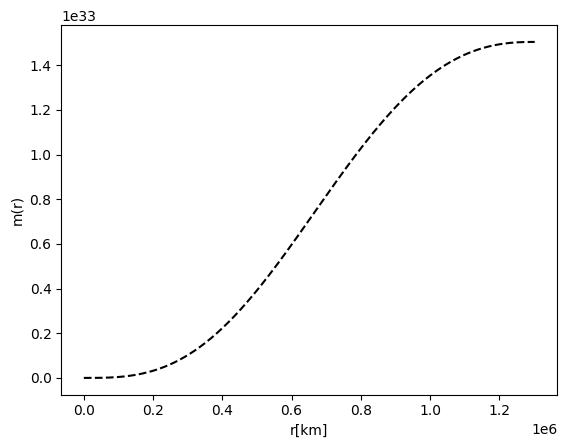

In [16]:
import numpy  as np
import matplotlib.pyplot as plt
data = np.loadtxt('output.txt')


x = data[:, 0]
y = data[:, 3]
plt.xlabel('r[km]')
plt.ylabel('m(r)')         # 1 solar mass = 2*10^33 grams
plt.plot(x, y,'k--')
plt.show()

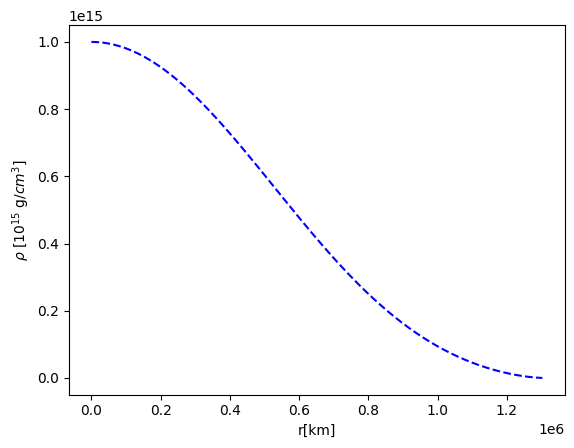

In [17]:
import numpy  as np
import matplotlib.pyplot as plt
data = np.loadtxt('output.txt')


x = data[:, 0]
y = data[:, 1]
plt.xlabel('r[km]')
plt.ylabel('$ \\rho $ [$10^{15}$ g/$cm^{3}$]')
plt.plot(x, y,'b--')
plt.show()